In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our data and taking a look at it

df = pd.read_csv('glassdoor_jobs_cleaned.csv')

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_text,job_state,same_state,age,Python_yn,R_yn,Aws_yn,Excel_yn,Spark_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,50,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,13,1,0,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,25,1,0,0,1,0


In [24]:
#Take a description on our data

df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,same_state,age,Python_yn,R_yn,Aws_yn,Excel_yn,Spark_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.237197,0.522911,0.225067,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.425651,0.499812,0.417908,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [25]:
#Take a look at the list of columns of our dataframe

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'same_state', 'age', 'Python_yn', 'R_yn',
       'Aws_yn', 'Excel_yn', 'Spark_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

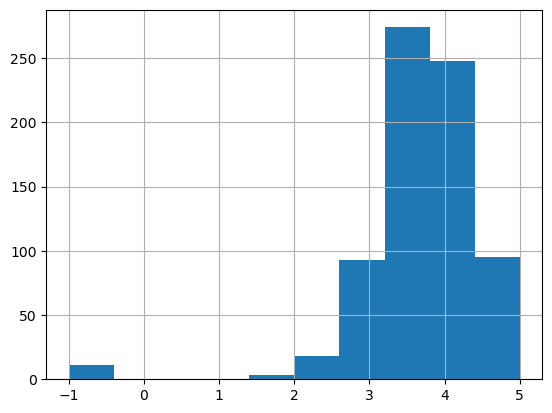

In [26]:
#Know the distribution of some variables

df.Rating.hist()

<AxesSubplot:>

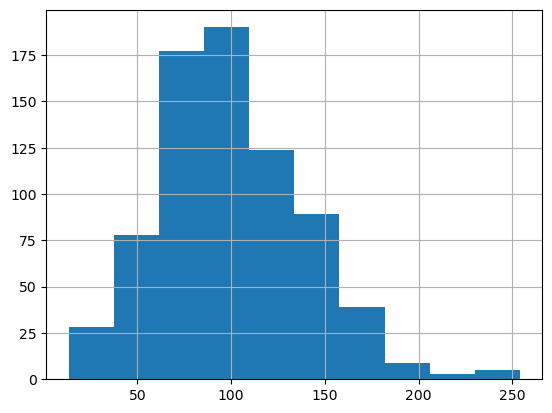

In [27]:
df.avg_salary.hist()

<AxesSubplot:>

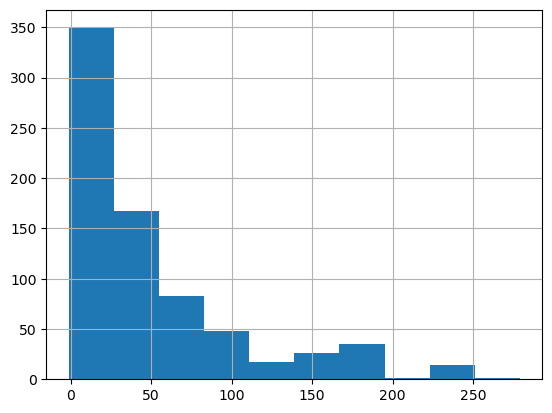

In [28]:
df.age.hist()

<AxesSubplot:>

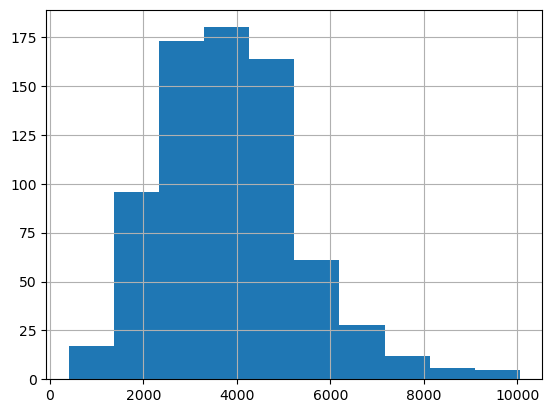

In [29]:
df.desc_len.hist()

<AxesSubplot:>

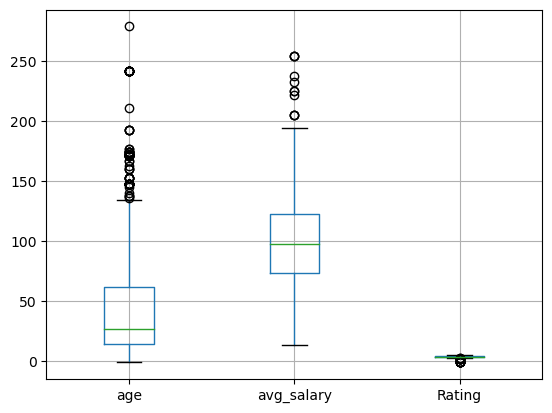

In [30]:
#Checking for outliers for some variables

df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

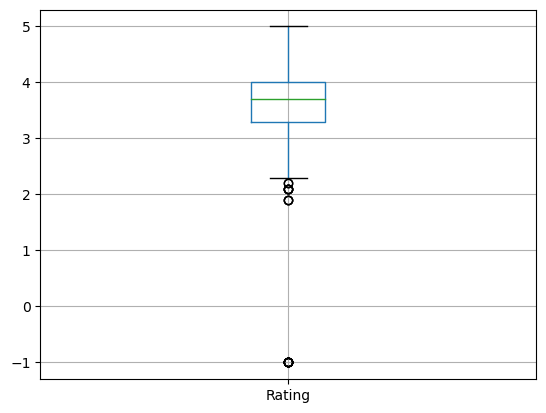

In [31]:
df.boxplot(column='Rating')

In [32]:
#Calculating correlation between a bunch of variables and visualizing it using a heatmap

df[['avg_salary', 'age', 'Rating', 'desc_len']].corr()

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,0.019410,0.013492,0.078808
age,0.019410,1.000000,0.026164,0.164730
Rating,0.013492,0.026164,1.000000,-0.012281
desc_len,0.078808,0.164730,-0.012281,1.000000


<AxesSubplot:>

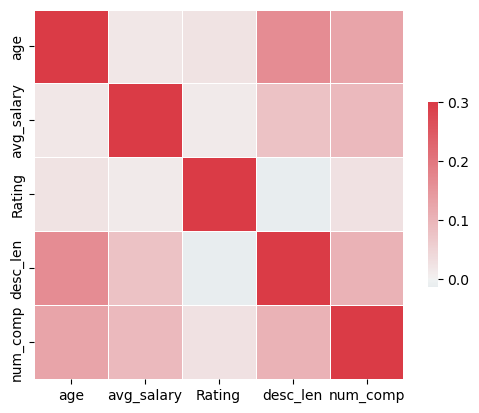

In [33]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for Location: total = 200


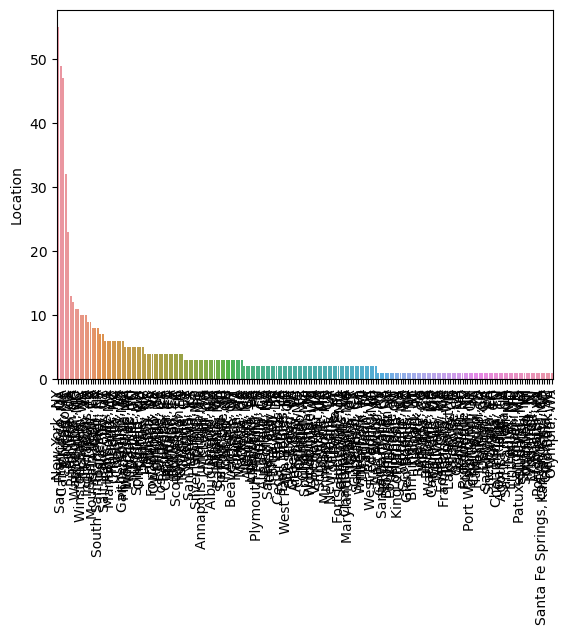

graph for Headquarters: total = 198


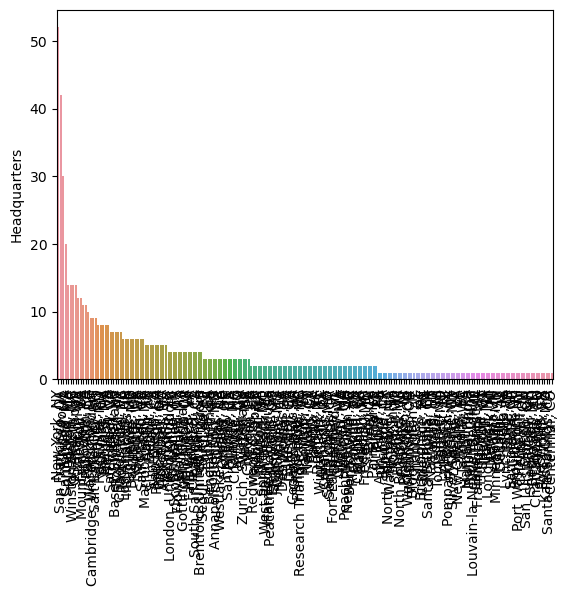

graph for Size: total = 9


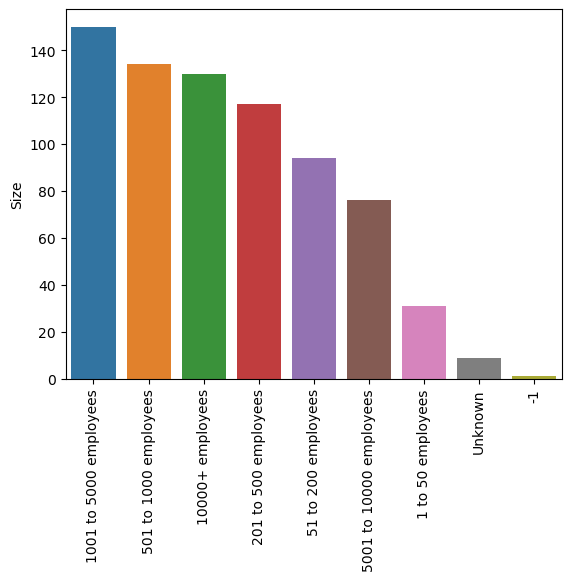

graph for Type of ownership: total = 11


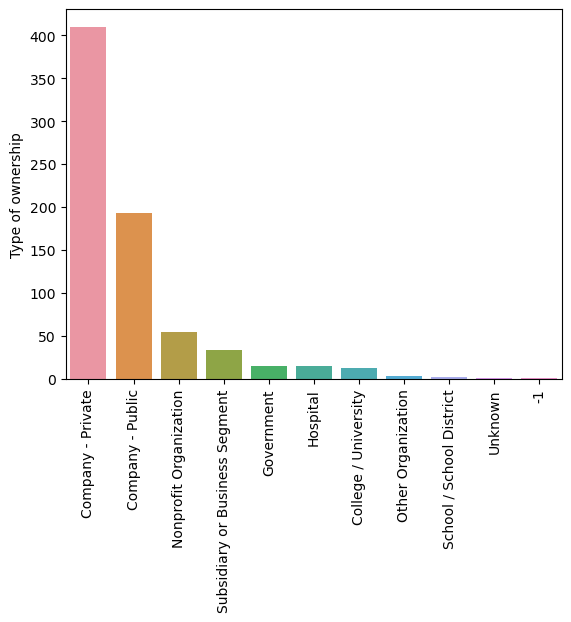

graph for Industry: total = 60


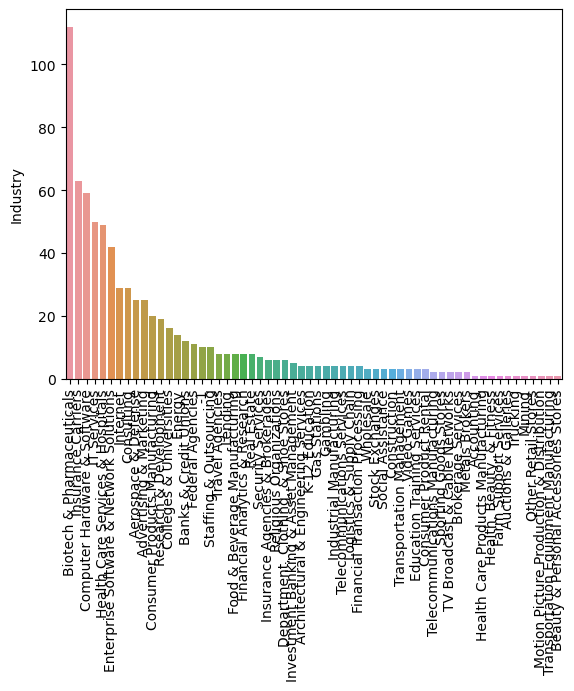

graph for Sector: total = 25


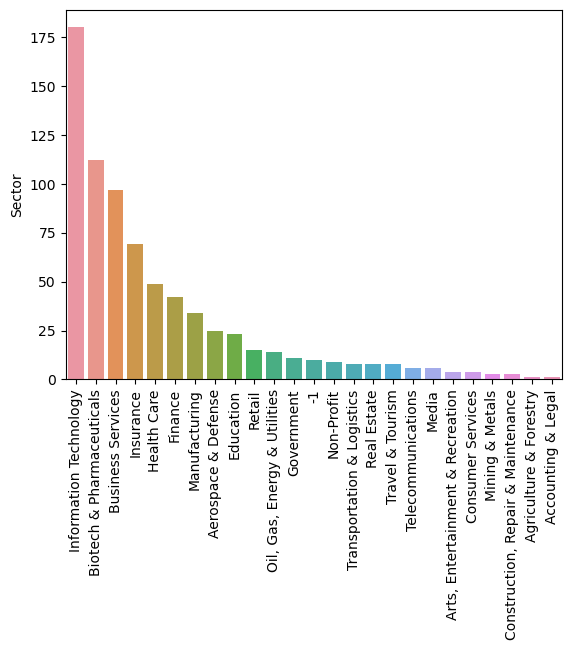

graph for Revenue: total = 14


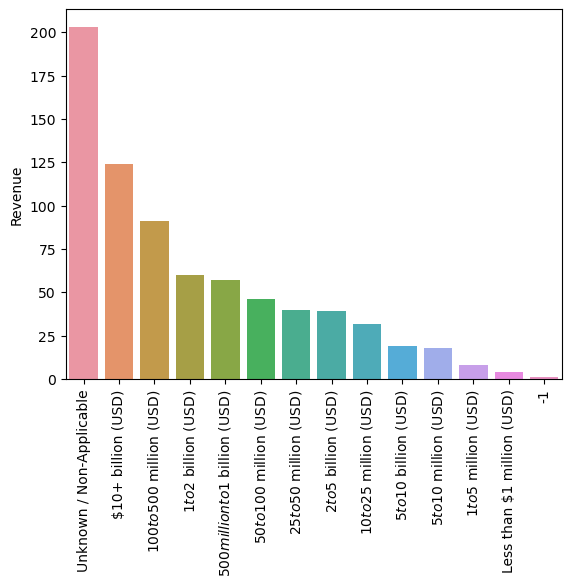

graph for Company_text: total = 343


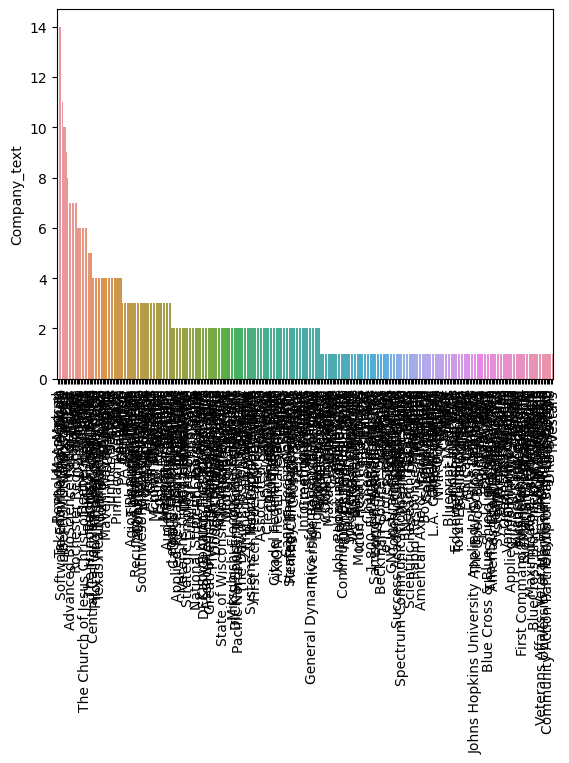

graph for job_state: total = 37


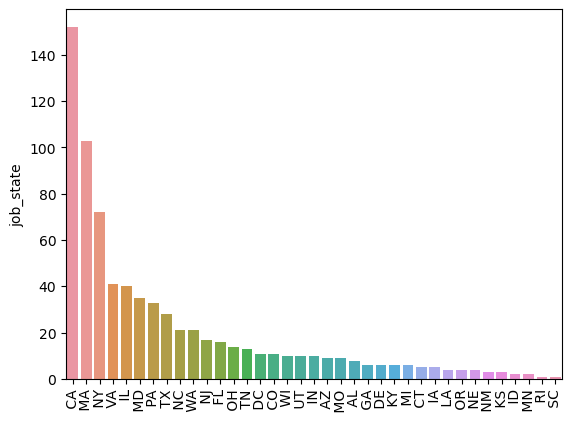

graph for same_state: total = 2


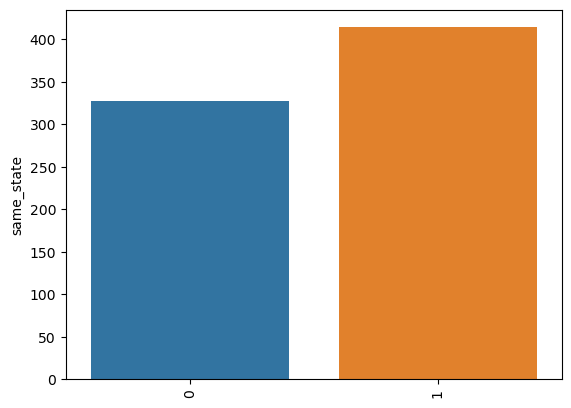

graph for Python_yn: total = 2


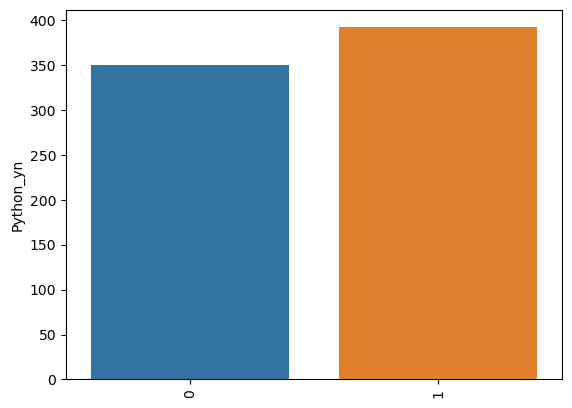

graph for R_yn: total = 2


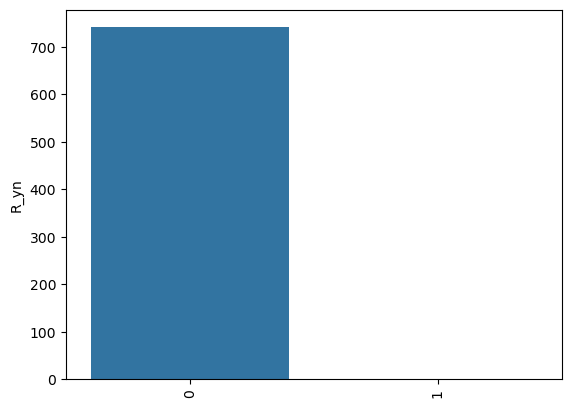

graph for Spark_yn: total = 2


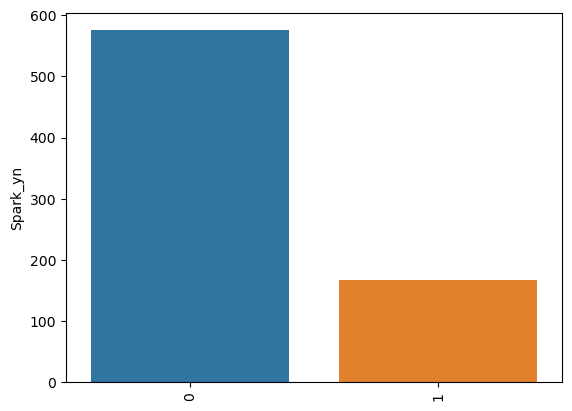

graph for Aws_yn: total = 2


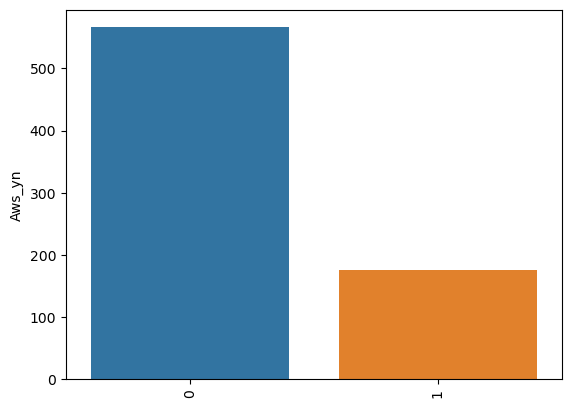

graph for Excel_yn: total = 2


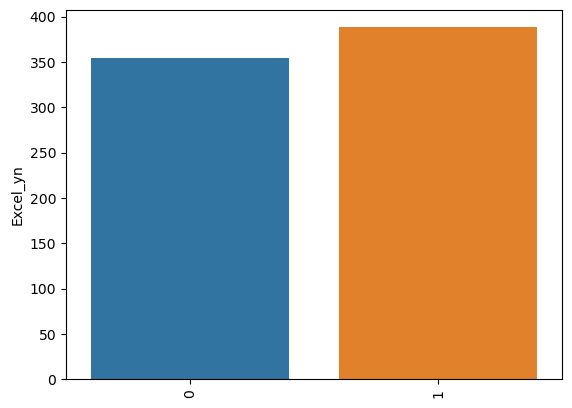

graph for job_simp: total = 7


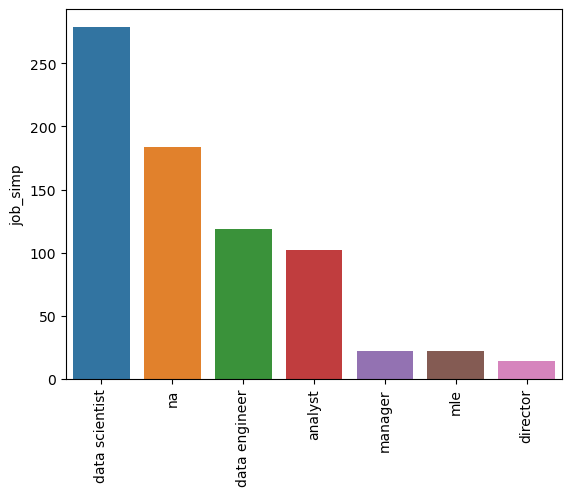

graph for seniority: total = 3


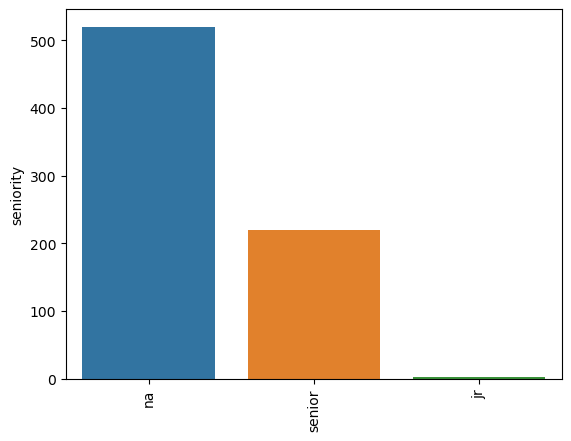

In [34]:
#Calculating value counts of each categorical variable in our dataset and visualize it

df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 'job_state','same_state', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


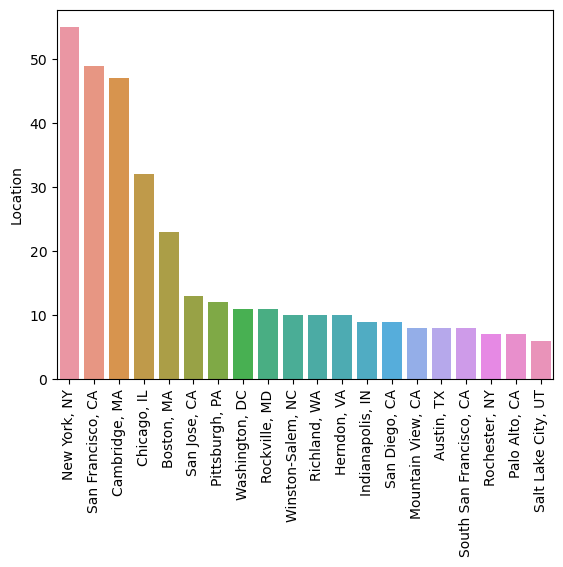

graph for Headquarters: total = 20


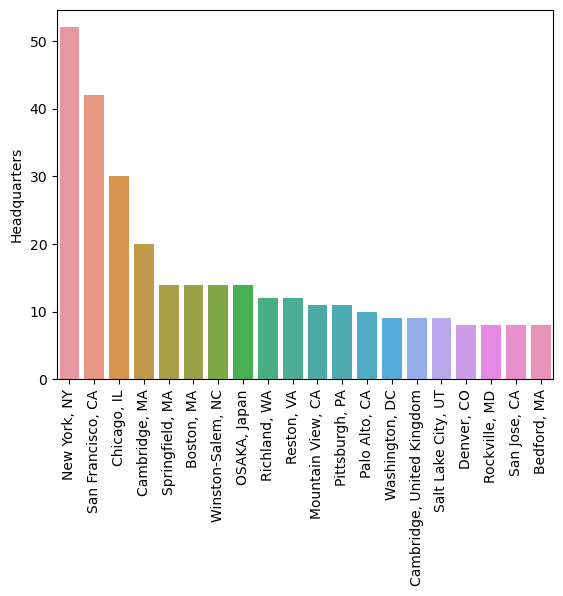

graph for Company_text: total = 20


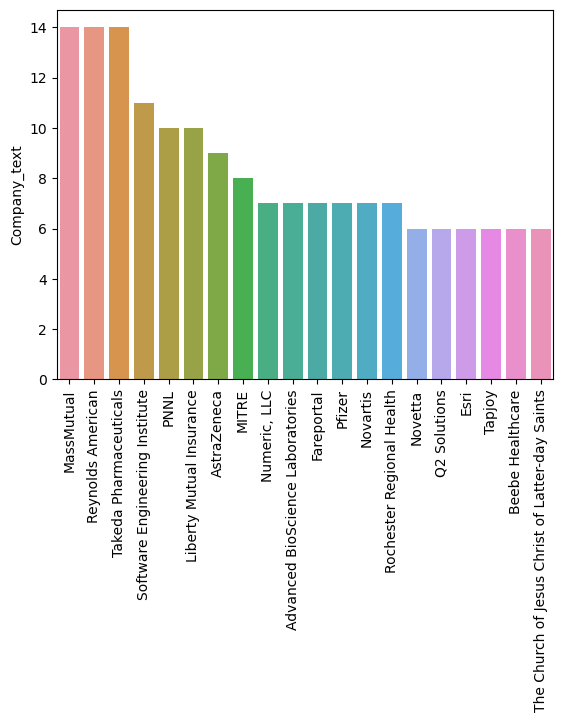

In [35]:
#Do the same thing with only Location, headquarters and Company text variables and we take just the first 20 categories

for i in ['Location', 'Headquarters', 'Company_text']:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [36]:
#Create a pivot table between average salary and job simp

pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [37]:
#Create a pivot table between average salary and job simp|seniority

pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [41]:
#Create a pivot table between average salary and job state|job simp

pd.set_option('display.max_rows', None)

pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
 WI       na               54.000000
          data scientist  113.500000
          analyst          58.833333
 WA       na               97.500000
          data scientist   99.764706
          analyst          54.500000
 VA       na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
 UT       data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
 TX       na               41.285714
          data scientist  100.730769
          data engineer   113.062500
 TN       data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
 SC       na               60.500000
 RI       analyst         100.000000
 PA       manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
 OR       data scientist   98.500000
          data engineer    73.000000
 OH       na               91.166667
          data scientist  105.285714
          analyst          53.875000
 NY       na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
 NM       data scientist   74.333333
 NJ       data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
 NE       na               41.000000
 NC       na               90.916667
          data scientist  117.000000
          data engineer   104.250000
 MO       na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
 MN       data engineer    95.000000
          analyst          76.000000
 MI       manager          87.500000
          data scientist  106.625000
 MD       na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
 MA       na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
 LA       analyst          48.000000
          data engineer    70.500000
          na               20.000000
 KY       na              103.500000
          data scientist   84.000000
 KS       mle              87.000000
 IN       na               69.000000
          data scientist   84.500000
          data engineer   114.500000
 IL       analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
 ID       analyst          56.250000
 IA       analyst          43.000000
          data engineer   102.833333
 GA       data scientist   81.333333
          na               80.000000
 FL       data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
 DE       na               27.500000
 DC       data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
 CT       na               62.500000
          data scientist   84.000000
 CO       mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
 CA       na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [43]:
#Create a pivot table between average salary and job state for only data science jobs

pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [44]:
#Create a pivot table between average salary and Revenue|Python yes or no

pd.pivot_table(df, index='Revenue', columns='Python_yn', values='avg_salary', aggfunc='count')

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [46]:
#Installing needed packages

!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.3 MB/s eta 0:00:00


In [47]:
#Importing required packages for word cloud so we could see the most frequent words in Job Description field

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

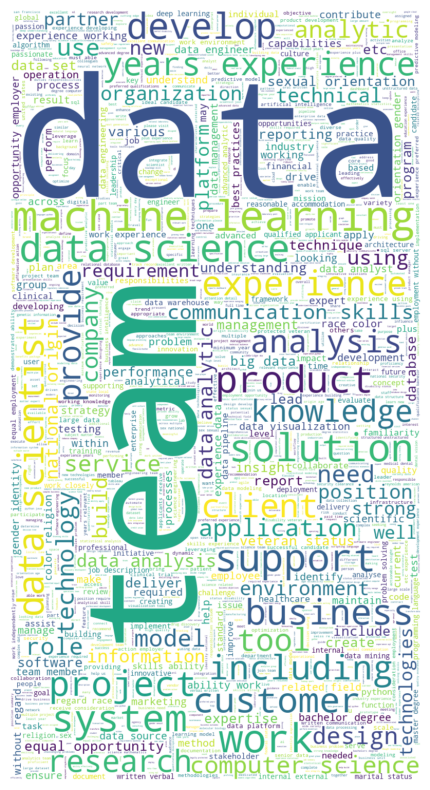

In [53]:
#Applying the word cloud process and visualize the most frequent words in Job Description variable

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc.generate(text), interpolation="bilinear")
plt.axis('off')
plt.show()